# Creating Different Types of Plots

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
data = pd.read_csv('cars_2010_2020.csv')

In [32]:
data.show

Make     Model  Year  Engine Size (L) Fuel Type  Price (USD)
0     Volkswagen     Jetta  2010              4.2    Petrol     54073.09
1          Honda     Pilot  2017              4.2    Hybrid     44924.91
2         Nissan    Murano  2011              4.2    Hybrid     76963.44
3         Toyota      RAV4  2010              2.4    Petrol     30871.25
4         Nissan    Altima  2010              3.6    Petrol     72037.65
...          ...       ...   ...              ...       ...          ...
9995         BMW  3 Series  2018              1.9    Hybrid     31676.02
9996     Hyundai    Sonata  2011              2.6    Diesel     67942.46
9997   Chevrolet    Impala  2011              1.3  Electric     64342.88
9998         BMW        X3  2020              1.4    Diesel     50060.30
9999   Chevrolet   Equinox  2018              2.7  Electric     53418.84

[10000 rows x 6 columns]

In [34]:
pd.option_context('mode.use_inf_as_na', True)

# Line Plot

C:\Users\manjh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manjh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


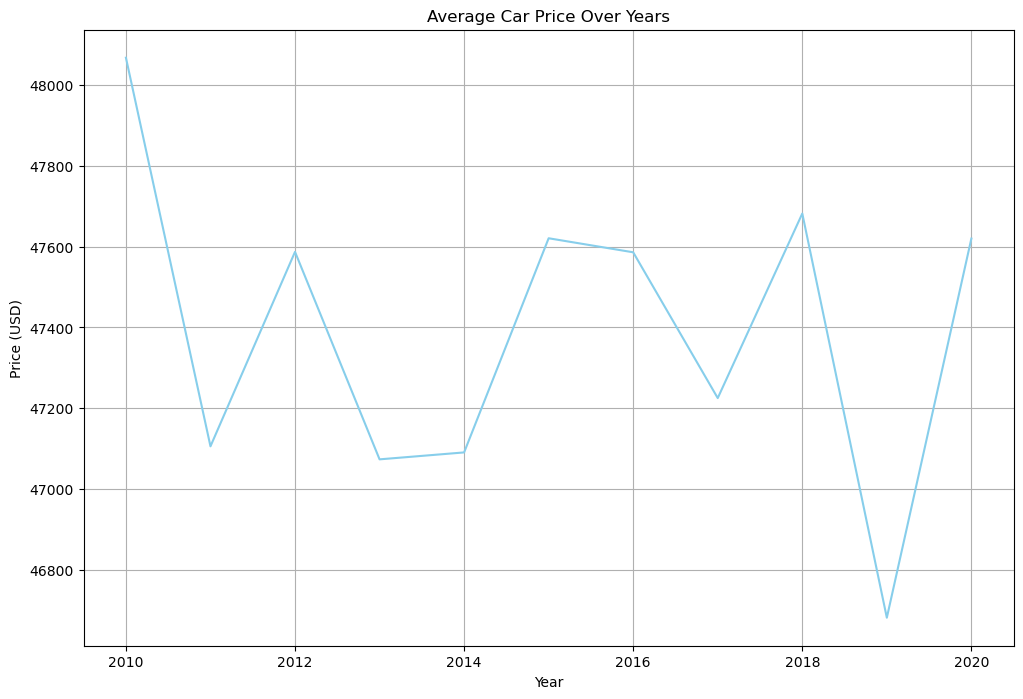

In [280]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=data.groupby('Year')['Price (USD)'].mean().reset_index(), x='Year', y='Price (USD)', color='skyblue')
plt.title('Average Car Price Over Years')
plt.grid(True)

# Bar Plot

Text(0.5, 1.0, 'Distribution of Car Makes')

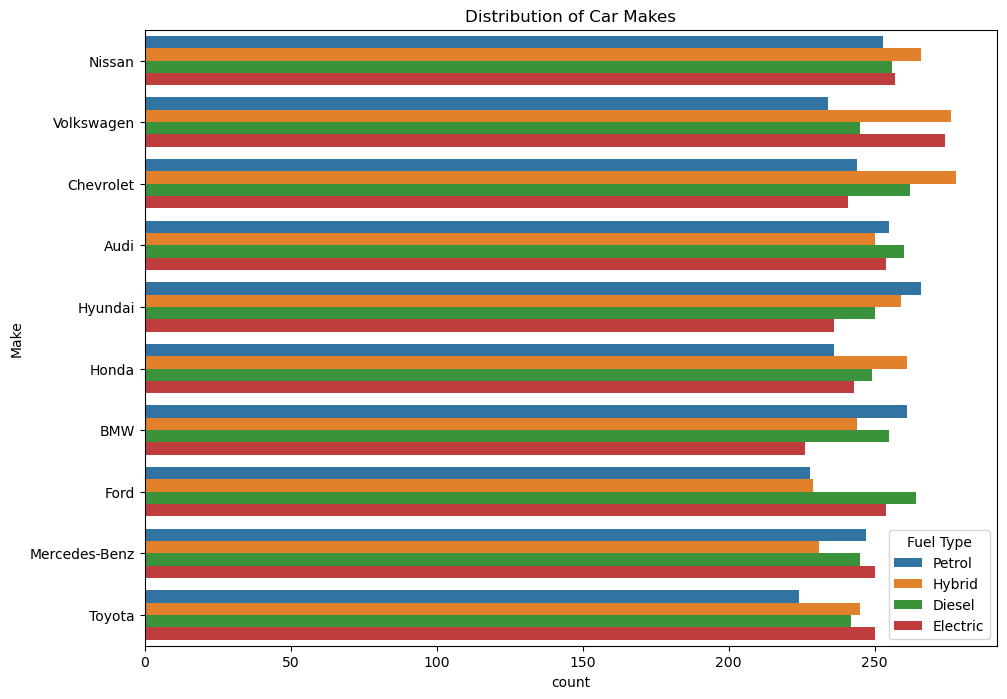

In [278]:
plt.figure(figsize=(11, 8))
sns.countplot(y='Make', hue='Fuel Type', data=data, order=data['Make'].value_counts().index)
plt.title('Distribution of Car Makes')

# 3D Bar Plot


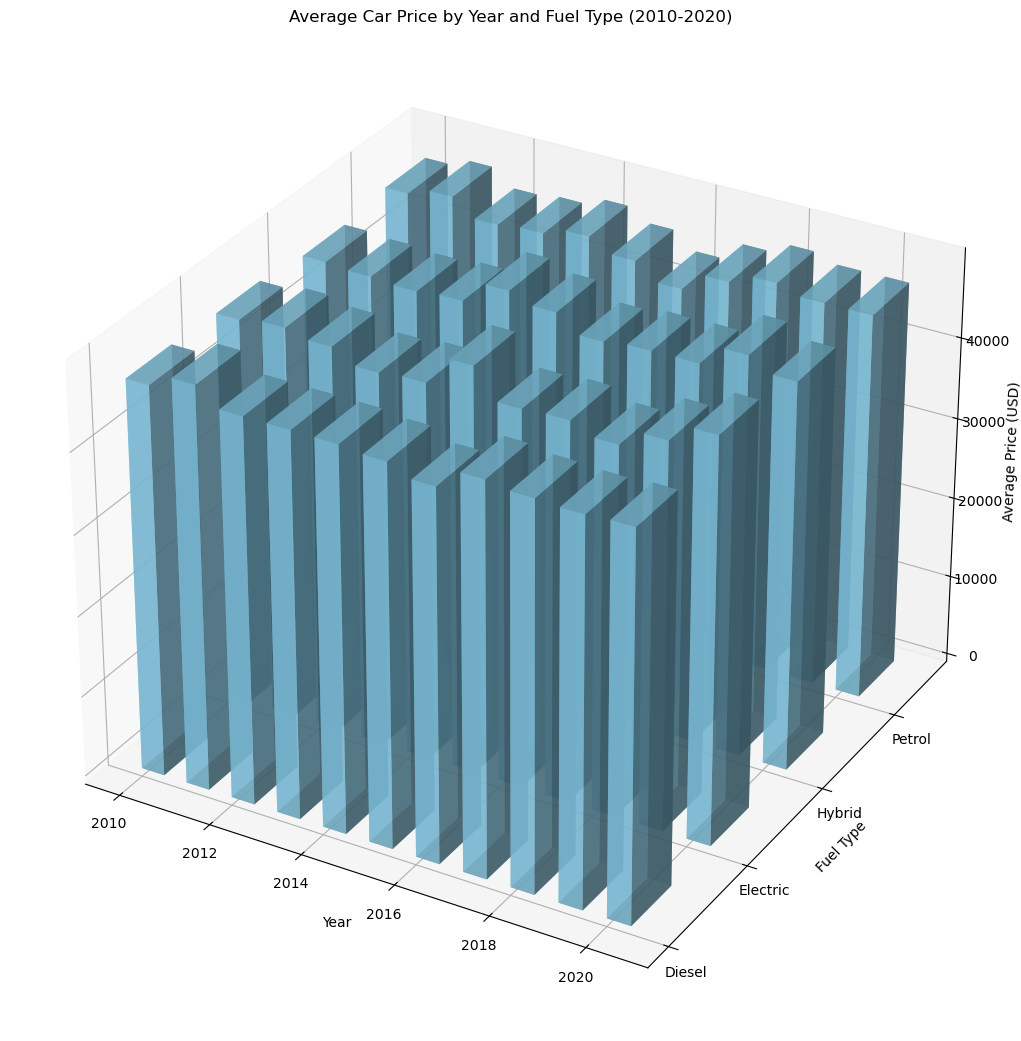

In [276]:
from mpl_toolkits.mplot3d import Axes3D
avg_price = data.groupby(['Year', 'Fuel Type'])['Price (USD)'].mean().unstack()
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')

years = avg_price.index
fuel_types = avg_price.columns
xpos, ypos = np.meshgrid(years, np.arange(len(fuel_types)))

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

heights = avg_price.values.flatten()
dx = dy = 0.5
ax.bar3d(xpos, ypos, zpos, dx, dy, heights, color='skyblue', alpha=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('Fuel Type')
ax.set_zlabel('Average Price (USD)')
ax.set_yticks(np.arange(len(fuel_types)))
ax.set_yticklabels(fuel_types)
ax.set_title('Average Car Price by Year and Fuel Type (2010-2020)')

plt.show()


# Histogram

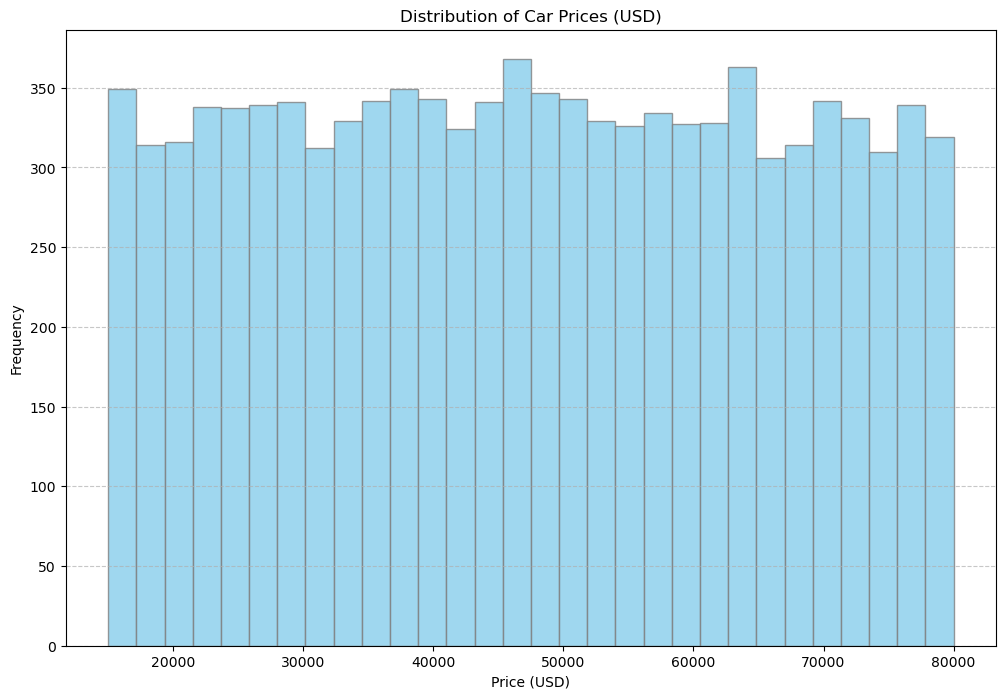

In [274]:
plt.figure(figsize=(12, 8))
plt.hist(data['Price (USD)'], bins=30, color='skyblue', edgecolor='gray', alpha=0.8)
plt.title('Distribution of Car Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Scatter Plot

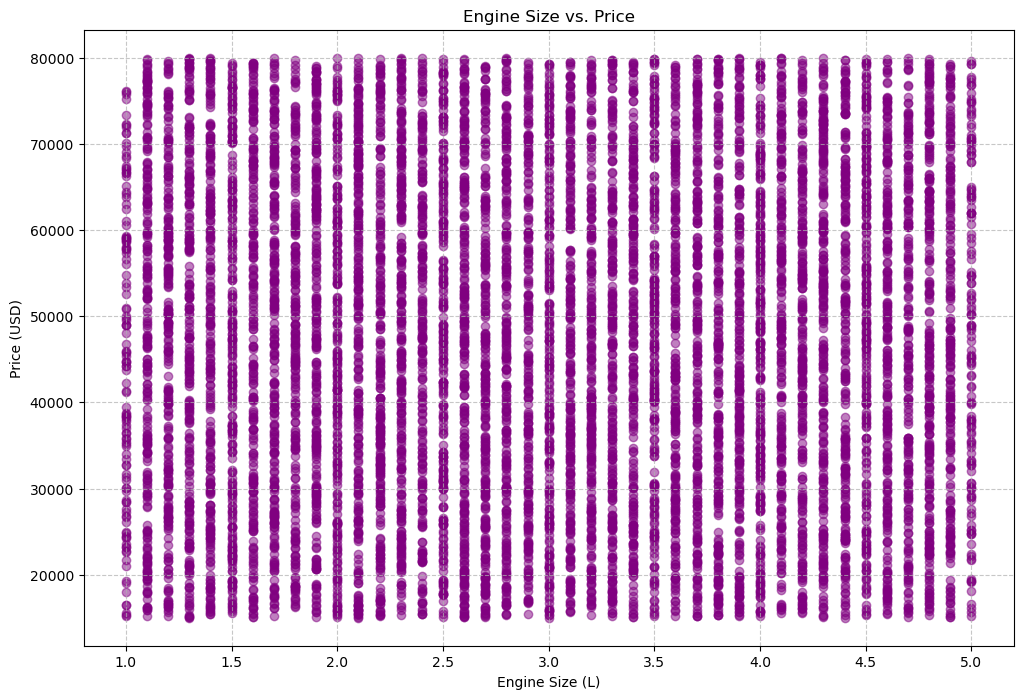

In [272]:
plt.figure(figsize=(12, 8))
plt.scatter(data['Engine Size (L)'], data['Price (USD)'], alpha=0.5, c='purple')
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price (USD)')
plt.grid(True, linestyle='--', alpha=0.7)

# 3D Scatter Plot

Text(0.5, 0.92, '3D Scatter Plot of Car Data')

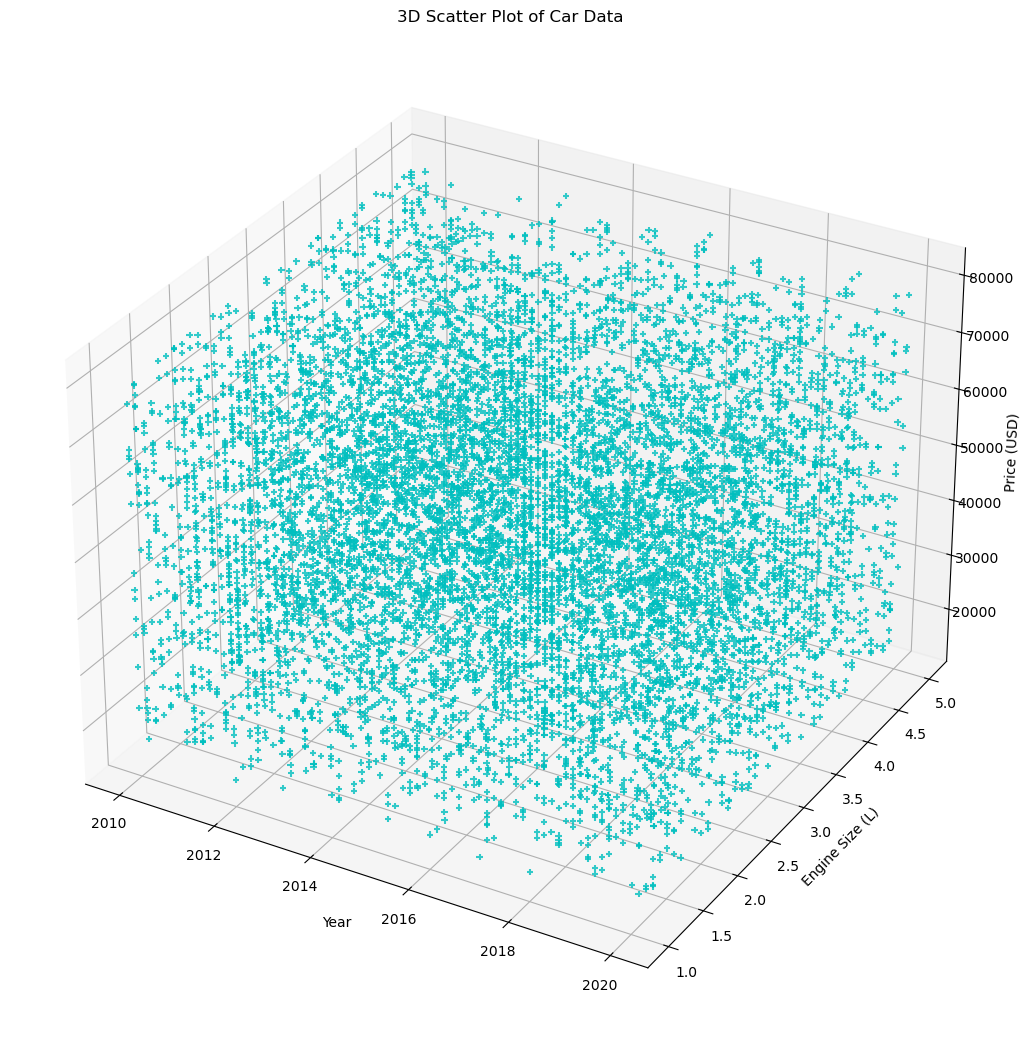

In [389]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Year'], data['Engine Size (L)'], data['Price (USD)'], c='c', marker='+', alpha=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Engine Size (L)')
ax.set_zlabel('Price (USD)')
ax.set_title('3D Scatter Plot of Car Data')

# Stack Plot

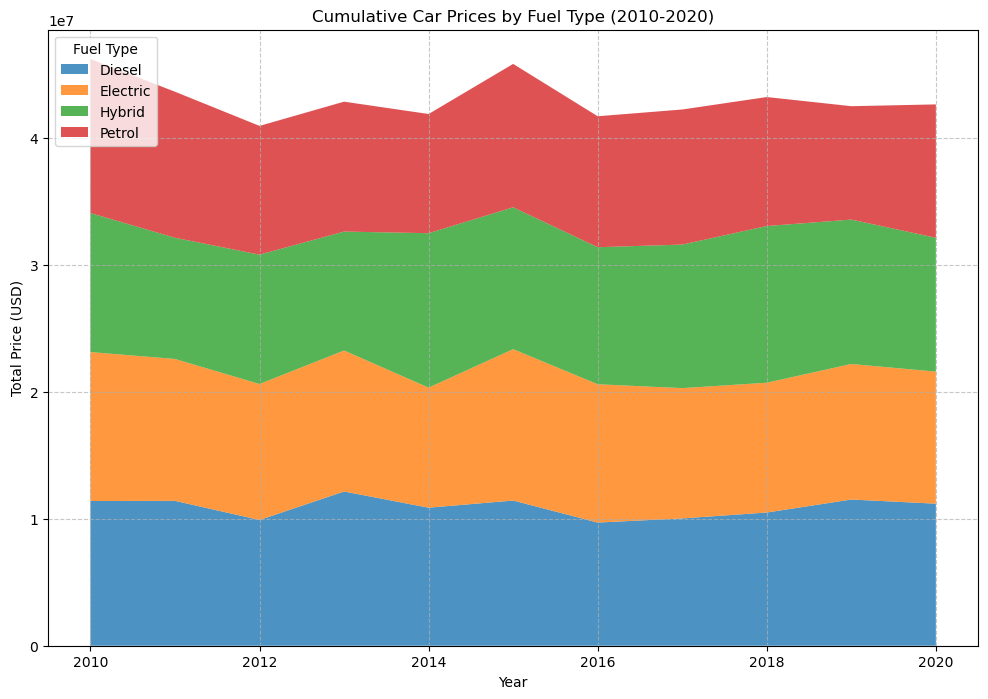

In [180]:
stack_data = data.groupby(['Year', 'Fuel Type'])['Price (USD)'].sum().unstack()
plt.figure(figsize=(12, 8))
plt.stackplot(stack_data.index, stack_data.T, labels=stack_data.columns, alpha=0.8)
plt.title('Cumulative Car Prices by Fuel Type (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Total Price (USD)')
plt.legend(title='Fuel Type', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Pie Chart

Text(0.5, 1.0, 'Distribution of Cars by Fuel Type')

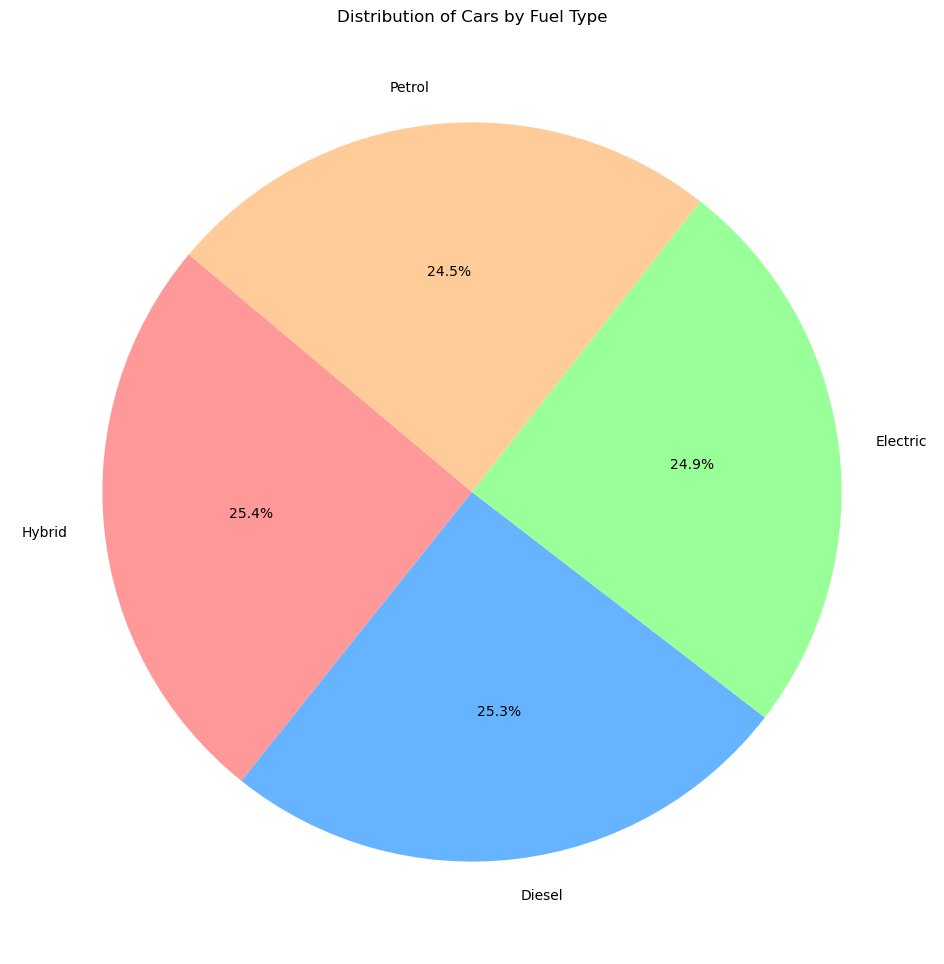

In [299]:
fuel_type_counts = data['Fuel Type'].value_counts()
plt.figure(figsize=(12, 12))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Cars by Fuel Type')

# Sub-plots

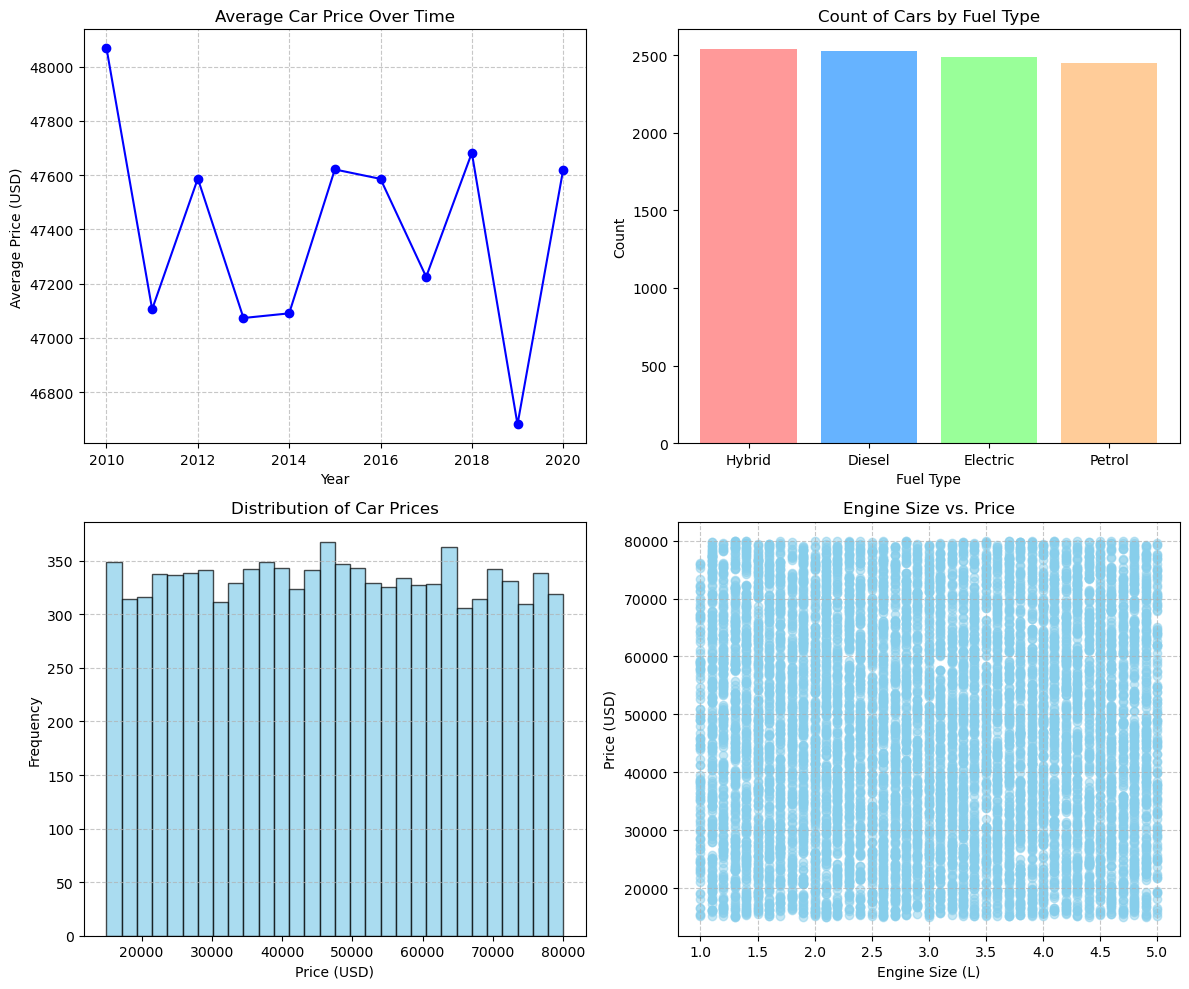

In [391]:
average_price_per_year = data.groupby('Year')['Price (USD)'].mean()
fuel_type_counts = data['Fuel Type'].value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Line plot: Average car price over time
axs[0, 0].plot(average_price_per_year.index, average_price_per_year.values, marker='o', linestyle='-', color='b')
axs[0, 0].set_title('Average Car Price Over Time')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Average Price (USD)')
axs[0, 0].grid(True, linestyle='--', alpha=0.7)

# Bar plot: Count of cars by fuel type
axs[0, 1].bar(fuel_type_counts.index, fuel_type_counts.values, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axs[0, 1].set_title('Count of Cars by Fuel Type')
axs[0, 1].set_xlabel('Fuel Type')
axs[0, 1].set_ylabel('Count')

# Histogram: Distribution of car prices
axs[1, 0].hist(data['Price (USD)'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axs[1, 0].set_title('Distribution of Car Prices')
axs[1, 0].set_xlabel('Price (USD)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Scatter plot: Engine size vs. price
axs[1, 1].scatter(data['Engine Size (L)'], data['Price (USD)'], alpha=0.5, c='skyblue')
axs[1, 1].set_title('Engine Size vs. Price')
axs[1, 1].set_xlabel('Engine Size (L)')
axs[1, 1].set_ylabel('Price (USD)')
axs[1, 1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Wireframe

Text(0.5, 0.92, 'Wireframe Plot of Average Car Prices')

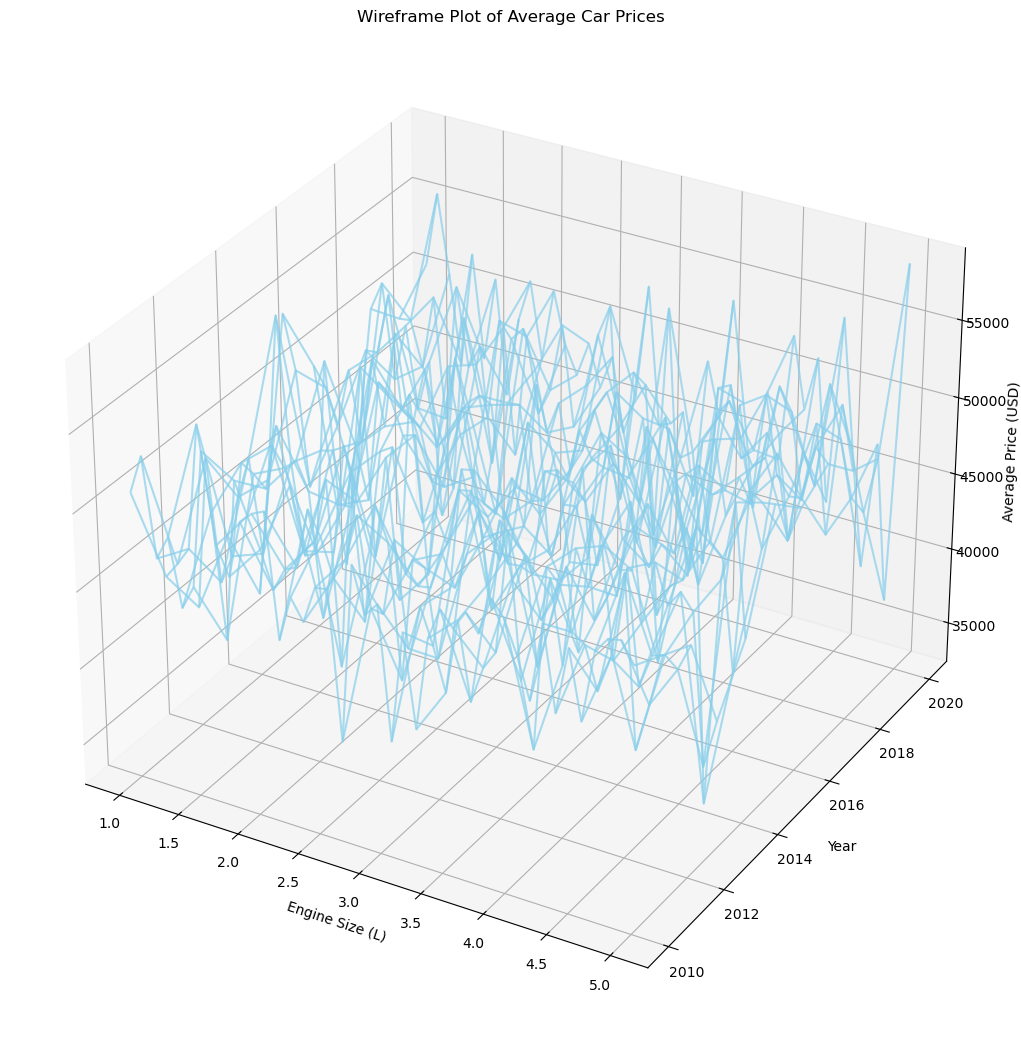

In [217]:
pivot_table = data.pivot_table(values='Price (USD)', index='Year', columns='Engine Size (L)', aggfunc='mean')
X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
Z = pivot_table.values

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, color='skyblue', alpha=0.7)

ax.set_xlabel('Engine Size (L)')
ax.set_ylabel('Year')
ax.set_zlabel('Average Price (USD)')
ax.set_title('Wireframe Plot of Average Car Prices')

# Heatmap

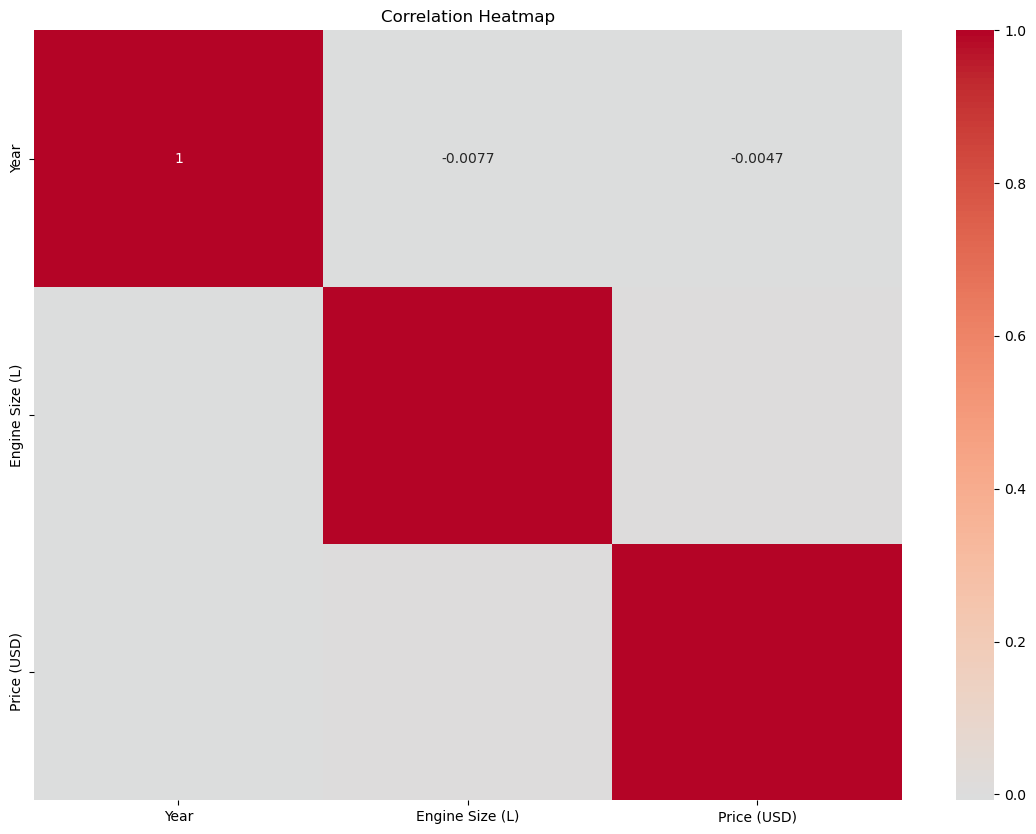

In [295]:
numerical_columns = data[['Year', 'Engine Size (L)', 'Price (USD)']]
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


# Join Plots

C:\Users\manjh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\manjh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\manjh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\manjh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\manjh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

<Figure size 1200x1000 with 0 Axes>

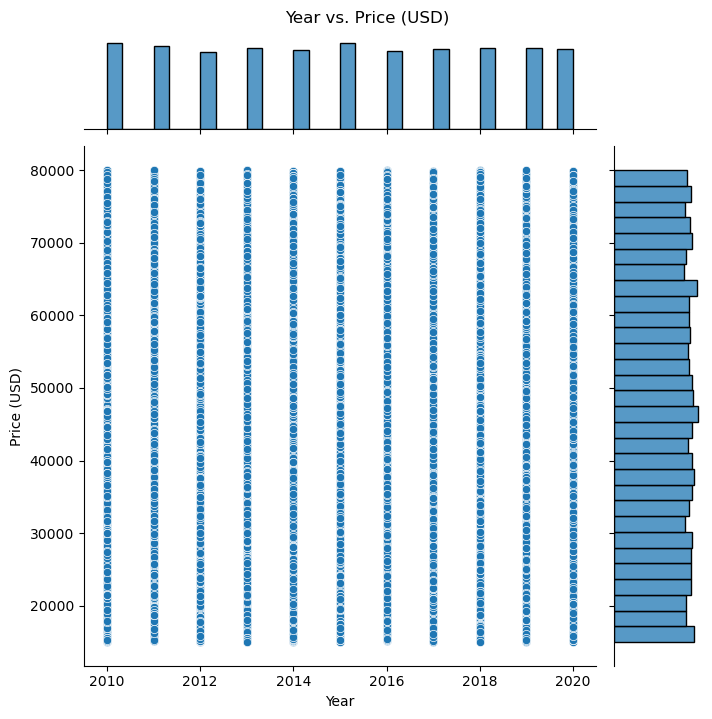

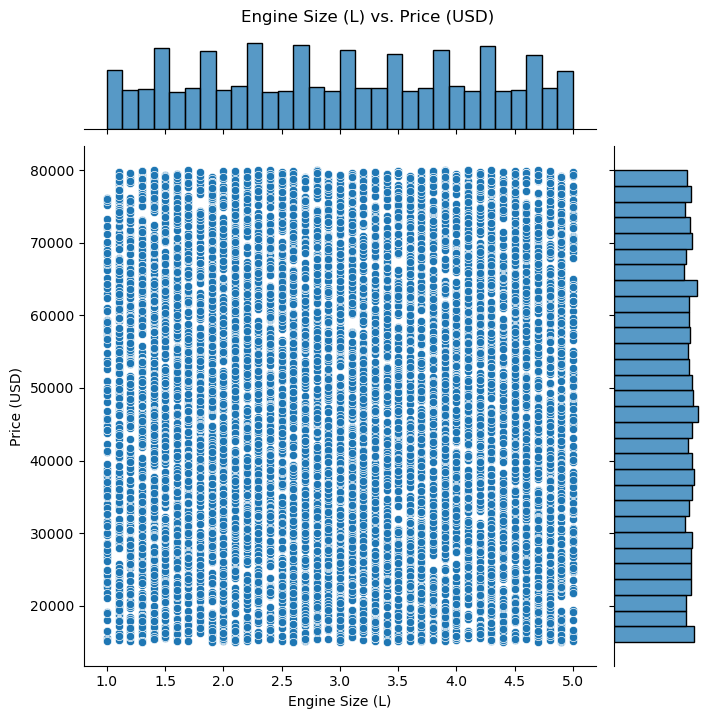

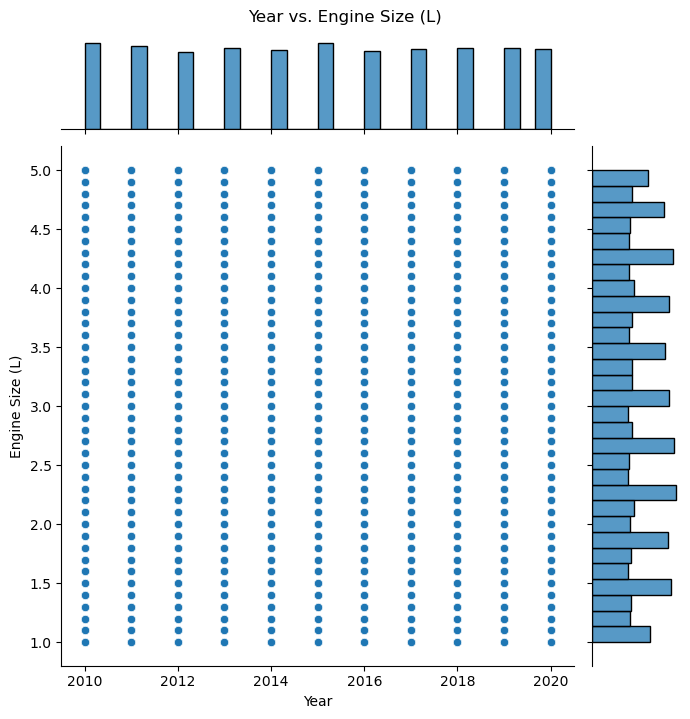

In [393]:
# Check for infinite values in the dataset
data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Create joint plots again after handling infinite values
plt.figure(figsize=(12, 10))

# Year vs. Price (USD)
sns.jointplot(x='Year', y='Price (USD)', data=data, kind='scatter', height=7, marginal_kws=dict(bins=30, fill=True))
plt.suptitle('Year vs. Price (USD)', y=1.02)

# Engine Size (L) vs. Price (USD)
sns.jointplot(x='Engine Size (L)', y='Price (USD)', data=data, kind='scatter', height=7, marginal_kws=dict(bins=30, fill=True))
plt.suptitle('Engine Size (L) vs. Price (USD)', y=1.02)

# Year vs. Engine Size (L)
sns.jointplot(x='Year', y='Engine Size (L)', data=data, kind='scatter', height=7, marginal_kws=dict(bins=30, fill=True))
plt.suptitle('Year vs. Engine Size (L)', y=1.02)

plt.show()


# Violin Plot

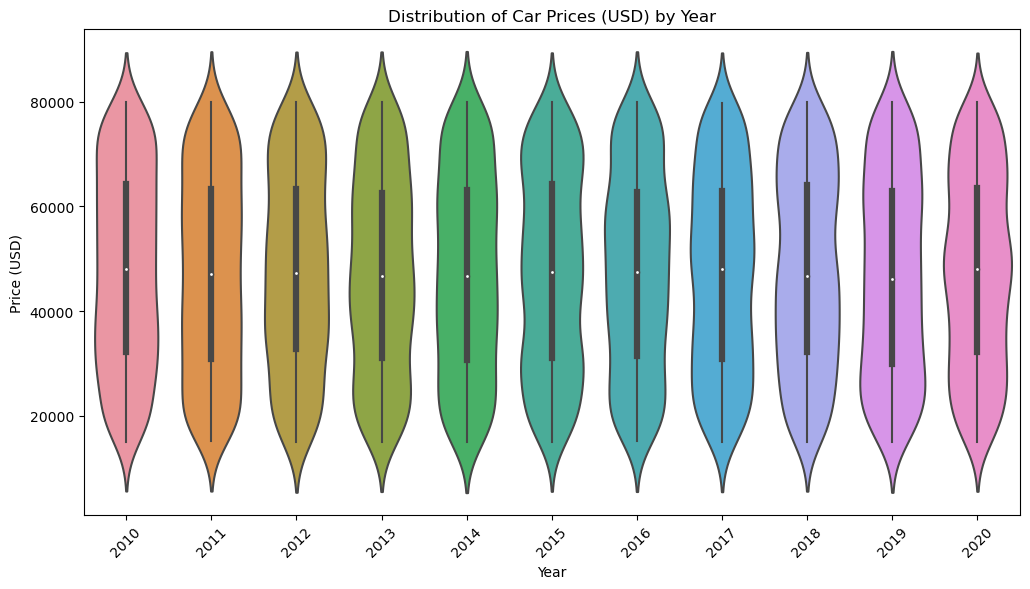

In [311]:
plt.figure(figsize=(10.4, 6))
sns.violinplot(x='Year', y='Price (USD)', data=data)
plt.title('Distribution of Car Prices (USD) by Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

# Box Plot

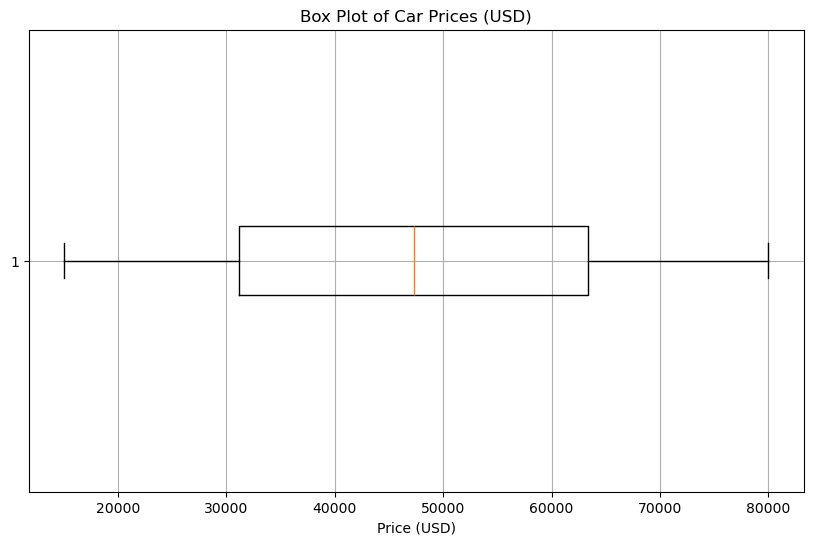

In [316]:

plt.figure(figsize=(10, 6))
plt.boxplot(data['Price (USD)'], vert=False)
plt.title('Box Plot of Car Prices (USD)')
plt.xlabel('Price (USD)')
plt.grid(True)
plt.show()


# Bubble Plot

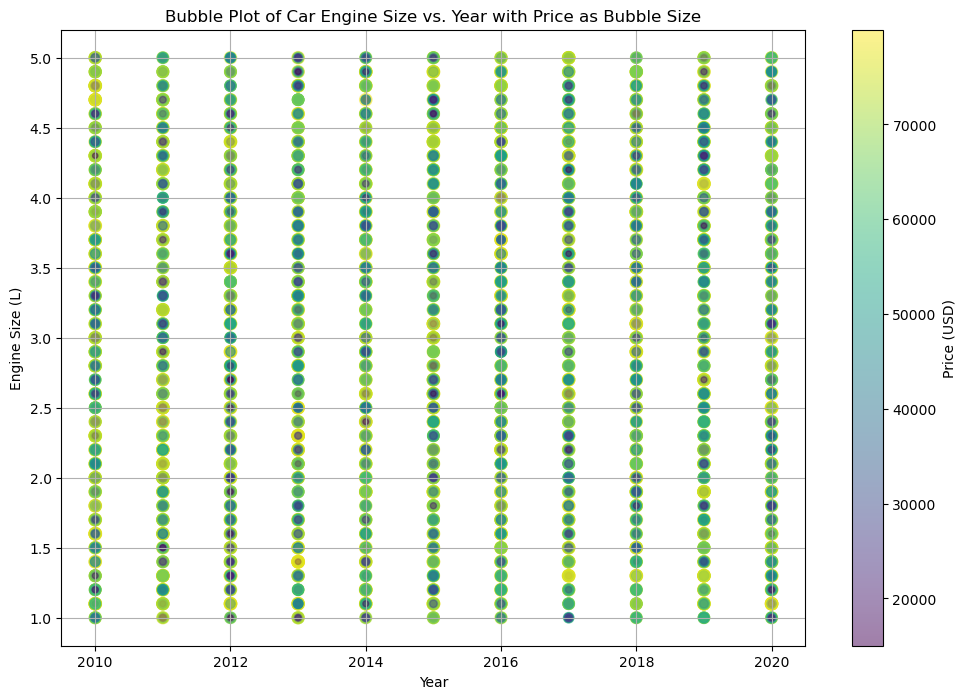

In [323]:
plt.figure(figsize=(12, 8))

plt.scatter(
    data['Year'], 
    data['Engine Size (L)'], 
    s=data['Price (USD)'] / 1000,  
    alpha=0.5,
    c=data['Price (USD)'],  
    cmap='viridis'
)

# Add titles and labels
plt.title('Bubble Plot of Car Engine Size vs. Year with Price as Bubble Size')
plt.xlabel('Year')
plt.ylabel('Engine Size (L)')
plt.colorbar(label='Price (USD)')

# Show plot
plt.grid(True)
plt.show()


# Web Plot

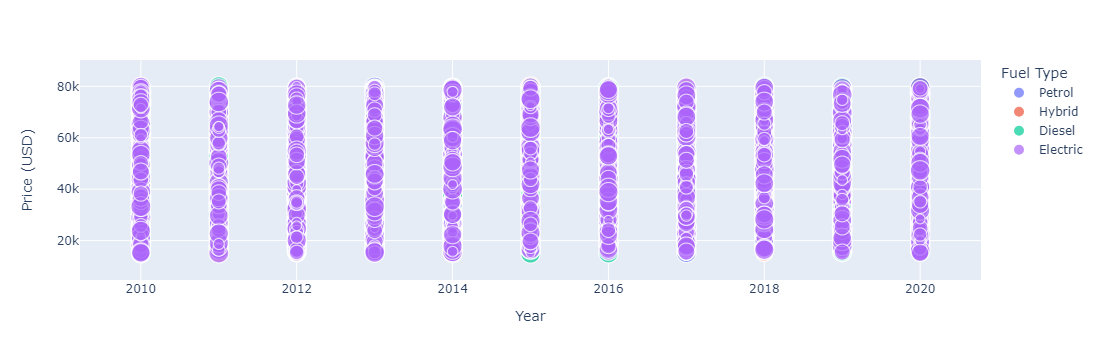

In [383]:
import plotly.express as px
fig = px.scatter(data, x='Year', y='Price (USD)', color='Fuel Type', 
                 size='Engine Size (L)', hover_data=['Make', 'Model'])


fig.show()

In [340]:
# Save the plot as an HTML file
output_file_path = 'WT - Creating Different Types of Plots - multivariate_scatter_plot.html'
fig.write_html(output_file_path)

output_file_path

'WT - Creating Different Types of Plots - multivariate_scatter_plot.html'

# Tree Plot

In [345]:
# Create a sunburst plot to visualize hierarchical data
fig = px.sunburst(data, path=['Make', 'Model'], values='Price (USD)', 
                  color='Engine Size (L)', hover_data=['Year', 'Fuel Type'])

# Save the plot as an HTML file
tree_output_file_path = 'WT - Creating Different Types of Plot - hierarchical_tree_plot.html'
fig.write_html(tree_output_file_path)

tree_output_file_path

'WT - Creating Different Types of Plot - hierarchical_tree_plot.html'

# Venn Diagram

Text(0.5, 1.0, 'Venn Diagram of Cars')

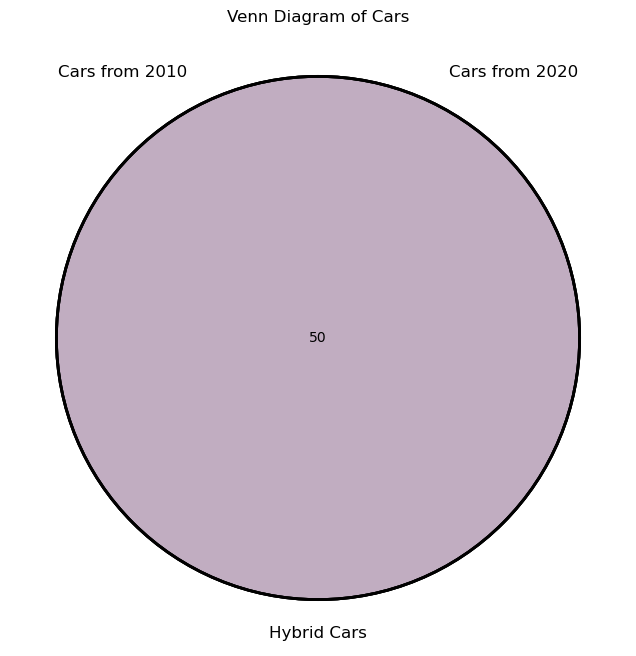

In [379]:
from matplotlib_venn import venn3, venn3_circles
cars_2010 = set(data[data['Year'] == 2010]['Model'])
cars_2020 = set(data[data['Year'] == 2020]['Model'])
hybrid_cars = set(data[data['Fuel Type'] == 'Hybrid']['Model'])
petrol_cars = set(data[data['Fuel Type'] == 'Petrol']['Model'])
plt.figure(figsize=(12, 8))

venn_diagram = venn3([cars_2010, cars_2020, hybrid_cars],
                     ('Cars from 2010', 'Cars from 2020', 'Hybrid Cars'))
venn3_circles([cars_2010, cars_2020, hybrid_cars])
plt.title("Venn Diagram of Cars")

# Word Cloud

Text(0.5, 1.0, 'Word Cloud of Car Models')

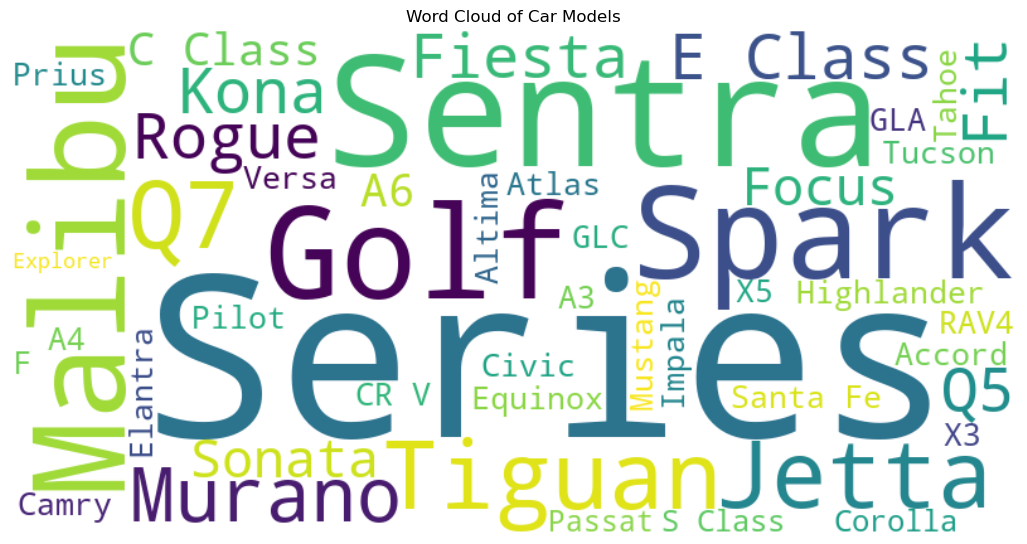

In [397]:
from wordcloud import WordCloud
text_data = ' '.join(data['Model'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(13, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud of Car Models")